# End-To-End Covid Stay Project

In this project we would have to predict the time span of the patient who is suffering from covid based on certain parameters like:

* Hospital_code
* Hospital_type_code
* city_code_hospital
* hospital_region_code
* Available_extra_rooms_in_hospital
* Department
* ward_type
* ward_facility_code
* Bed_Grade
* patient_id
..............etc


### Importing the data from GitHub

In [ ]:
!wget https://raw.githubusercontent.com/Adwait01-Bhosale/RoboSpark/master/Covid_Stay_Data.csv

--2021-10-15 06:44:07--  https://raw.githubusercontent.com/Adwait01-Bhosale/RoboSpark/master/Covid_Stay_Data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 26915586 (26M) [text/plain]
Saving to: ‘Covid_Stay_Data.csv’

Covid_Stay_Data.csv 100%[===================>]  25.67M  93.0MB/s    in 0.3s    

2021-10-15 06:44:09 (93.0 MB/s) - ‘Covid_Stay_Data.csv’ saved [26915586/26915586]



In [ ]:
# Loading the data using pandas 
import pandas as pd
import random
data=pd.read_csv("Covid_Stay_Data.csv")

In [ ]:
#  Taking only 8000 rows of dataset
data=data.sample(8000)

In [ ]:
data.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
233291,233292,28,b,11,X,3,gynecology,R,F,3.0,30818,1.0,Emergency,Moderate,2,61-70,5342.0,11-20
13834,13835,6,a,6,X,6,anesthesia,Q,F,3.0,60047,2.0,Emergency,Extreme,4,31-40,3679.0,11-20
289527,289528,23,a,6,X,2,gynecology,R,F,4.0,20569,25.0,Urgent,Minor,3,61-70,4728.0,21-30
149125,149126,2,c,5,Z,2,gynecology,Q,F,4.0,858,2.0,Urgent,Moderate,3,31-40,5263.0,11-20
231378,231379,6,a,6,X,4,gynecology,Q,F,3.0,23462,2.0,Emergency,Moderate,3,0-10,3931.0,11-20


In [ ]:
# Renaming all the columns to avoid errors of column name 
data.rename(columns = {'Bed Grade' : 'Bed_Grade', 'Available Extra Rooms in Hospital' : 'Available_Extra_Rooms_in_Hospital','Type of Admission':'Type_of_Admission','Severity of Illness':'Severity_of_Illness','Visitors with Patient':'Visitors_with_Patient'},inplace=True)

## Dropping Few Unnecessary Columns

In [ ]:
data.drop('case_id',axis=1,inplace=True)

In [ ]:
data.drop('patientid',axis=1,inplace=True)

In [ ]:
data['Hospital_code'].unique()

array([28,  6, 23,  2, 12, 21, 32, 11, 29, 26, 25,  3, 19,  5, 14, 13,  8,
       10, 24, 17, 15,  9, 22,  1,  7, 20, 30, 18, 27, 31, 16,  4])

In [ ]:
data.drop('Hospital_code',axis=1,inplace=True)

In [ ]:
data['City_Code_Hospital'].unique()

array([11,  6,  5,  9,  3,  2,  4,  1,  7, 10, 13])

In [ ]:
data.drop('City_Code_Hospital',axis=1,inplace=True)

In [ ]:
data['Visitors_with_Patient'].unique()

array([ 2,  4,  3, 16,  6,  7,  8,  5, 10,  9, 14, 15,  1, 12, 11, 22, 24,
        0, 25, 13])

In [ ]:
data.drop('Visitors_with_Patient',axis=1,inplace=True)


In [ ]:
data['Hospital_region_code'].unique()

array(['X', 'Z', 'Y'], dtype=object)

In [ ]:
data.drop('Hospital_region_code',axis=1, inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 233291 to 119719
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hospital_type_code                 8000 non-null   object 
 1   Available_Extra_Rooms_in_Hospital  8000 non-null   int64  
 2   Department                         8000 non-null   object 
 3   Ward_Type                          8000 non-null   object 
 4   Ward_Facility_Code                 8000 non-null   object 
 5   Bed_Grade                          7996 non-null   float64
 6   City_Code_Patient                  7881 non-null   float64
 7   Type_of_Admission                  8000 non-null   object 
 8   Severity_of_Illness                8000 non-null   object 
 9   Age                                8000 non-null   object 
 10  Admission_Deposit                  8000 non-null   float64
 11  Stay                               8000 non-null 

### Counting the number of ranges of values present in the stay column

In [ ]:
data['Stay'].value_counts()

21-30                 2227
11-20                 1956
31-40                 1389
51-60                  877
0-10                   629
41-50                  274
71-80                  256
More than 100 Days     140
81-90                  108
91-100                  75
61-70                   69
Name: Stay, dtype: int64

In [ ]:
data.head()

,Hospital_type_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Age,Admission_Deposit,Stay
233291,b,3,gynecology,R,F,3.0,1.0,Emergency,Moderate,61-70,5342.0,11-20
13834,a,6,anesthesia,Q,F,3.0,2.0,Emergency,Extreme,31-40,3679.0,11-20
289527,a,2,gynecology,R,F,4.0,25.0,Urgent,Minor,61-70,4728.0,21-30
149125,c,2,gynecology,Q,F,4.0,2.0,Urgent,Moderate,31-40,5263.0,11-20
231378,a,4,gynecology,Q,F,3.0,2.0,Emergency,Moderate,0-10,3931.0,11-20


In [ ]:
# Checking out the info of every column in the data, also get to know the datatype of each column
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8000 entries, 233291 to 119719
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Hospital_type_code                 8000 non-null   object 
 1   Available_Extra_Rooms_in_Hospital  8000 non-null   int64  
 2   Department                         8000 non-null   object 
 3   Ward_Type                          8000 non-null   object 
 4   Ward_Facility_Code                 8000 non-null   object 
 5   Bed_Grade                          7996 non-null   float64
 6   City_Code_Patient                  7881 non-null   float64
 7   Type_of_Admission                  8000 non-null   object 
 8   Severity_of_Illness                8000 non-null   object 
 9   Age                                8000 non-null   object 
 10  Admission_Deposit                  8000 non-null   float64
 11  Stay                               8000 non-null 

In [ ]:
# Checking the shape of our dataset
data.shape

(8000, 12)

In [ ]:
# Here comes the step where we drop the unnecesary range of the column Stay
data=data[~data.Stay.str.contains("41-50")]
data=data[~data.Stay.str.contains("71-80")]
data=data[~data.Stay.str.contains("More than 100 Days")]
data=data[~data.Stay.str.contains("81-90")]
data=data[~data.Stay.str.contains("91-100")]
data=data[~data.Stay.str.contains("61-70")]

## `Nan` Values

In [ ]:
# Checking the naa values
data.isna().sum()

Hospital_type_code                     0
Available_Extra_Rooms_in_Hospital      0
Department                             0
Ward_Type                              0
Ward_Facility_Code                     0
Bed_Grade                              4
City_Code_Patient                    104
Type_of_Admission                      0
Severity_of_Illness                    0
Age                                    0
Admission_Deposit                      0
Stay                                   0
dtype: int64

In [ ]:
# Let's drop all the nan values of the `City_code_patient` column
data['City_Code_Patient'].dropna(inplace=True)

In [ ]:
# Let's fill the nan vlaues with mean fot the Bed_Grade Column
data.fillna(data['Bed_Grade'].mean(),inplace=True)

In [ ]:
len(data.columns)

12

## Data Visualisation

In [ ]:
import matplotlib.pyplot as plt

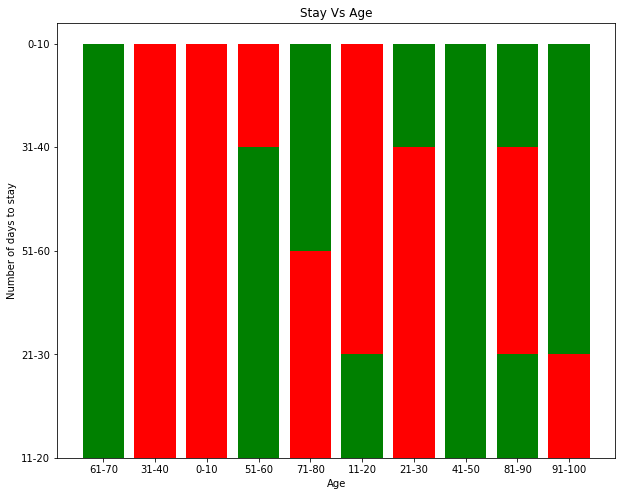

In [ ]:
# Plotting an bar plot for Age Vs Stay
fig,ax=plt.subplots(figsize=(10,8))
ax.bar(data['Age'],data['Stay'],color=['r','g'])
ax.set(title='Stay Vs Age',
       xlabel="Age",
       ylabel='Number of days to stay');

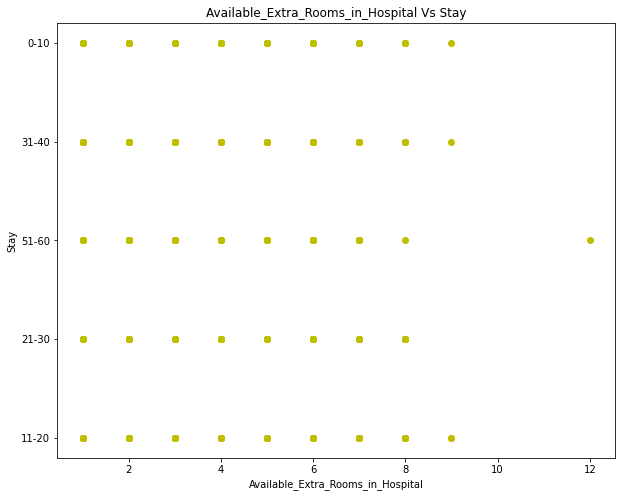

In [ ]:
# Plotting a scatter plot for Available_Extra_Rooms Vs Stay
fig,ax=plt.subplots(figsize=(10,8))
ax.scatter(data['Available_Extra_Rooms_in_Hospital'],data['Stay'],color=['y'])
ax.set(title="Available_Extra_Rooms_in_Hospital Vs Stay",
       xlabel="Available_Extra_Rooms_in_Hospital",
       ylabel="Stay");

## Label Encoding all the categorical columns


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Hospital_type_code']=le.fit_transform(data['Hospital_type_code'])

data['Department']=le.fit_transform(data['Department'])
data['Ward_Type']=le.fit_transform(data['Ward_Type'])
data['Ward_Facility_Code']=le.fit_transform(data['Ward_Facility_Code'])
data['Type_of_Admission']=le.fit_transform(data['Type_of_Admission'])
data['Severity_of_Illness']=le.fit_transform(data['Severity_of_Illness'])
data['Age']=le.fit_transform(data['Age'])
data['Stay']=le.fit_transform(data['Stay'])

## Splitting the data into two parts 
> Here we would be splitting our data into training and testing set where we would be having an ratio of 80:20, which means we would be giving 80% of the data for training part and 20% of the data for testing part

In [ ]:
from sklearn.model_selection import train_test_split
X=data.drop('Stay',axis=1)
y=data['Stay']

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

## Calculating the correlation 

In [ ]:
corr_mat=data.corr()

In [ ]:
corr_mat

,Hospital_type_code,Available_Extra_Rooms_in_Hospital,Department,Ward_Type,Ward_Facility_Code,Bed_Grade,City_Code_Patient,Type_of_Admission,Severity_of_Illness,Age,Admission_Deposit,Stay
Hospital_type_code,1.000000,-0.105228,0.014176,0.240818,-0.266975,0.009027,0.066223,0.055090,-0.001231,0.010473,0.022129,0.049391
Available_Extra_Rooms_in_Hospital,-0.105228,1.000000,0.038114,-0.420803,0.038378,-0.125256,0.003052,-0.030574,-0.000187,-0.135417,-0.151498,-0.072180
Department,0.014176,0.038114,1.000000,0.008594,-0.036120,-0.100274,0.023180,-0.091154,-0.004552,0.037856,-0.068375,0.033988
Ward_Type,0.240818,-0.420803,0.008594,1.000000,-0.159514,-0.020652,0.008135,0.013734,-0.003040,0.013097,0.051672,0.136049
Ward_Facility_Code,-0.266975,0.038378,-0.036120,-0.159514,1.000000,0.085545,-0.151085,0.079916,0.012759,0.007396,-0.039778,0.025463
Bed_Grade,0.009027,-0.125256,-0.100274,-0.020652,0.085545,1.000000,-0.002738,0.111299,0.014916,-0.010004,0.110418,-0.020875
City_Code_Patient,0.066223,0.003052,0.023180,0.008135,-0.151085,-0.002738,1.000000,-0.021993,-0.002444,-0.037971,0.029777,-0.030959
Type_of_Admission,0.055090,-0.030574,-0.091154,0.013734,0.079916,0.111299,-0.021993,1.000000,0.015469,-0.040853,0.043308,0.053765
Severity_of_Illness,-0.001231,-0.000187,-0.004552,-0.003040,0.012759,0.014916,-0.002444,0.015469,1.000000,-0.028047,0.022452,-0.014403
Age,0.010473,-0.135417,0.037856,0.013097,0.007396,-0.010004,-0.037971,-0.040853,-0.028047,1.000000,0.019049,0.073152


# Visualizing the correlation 

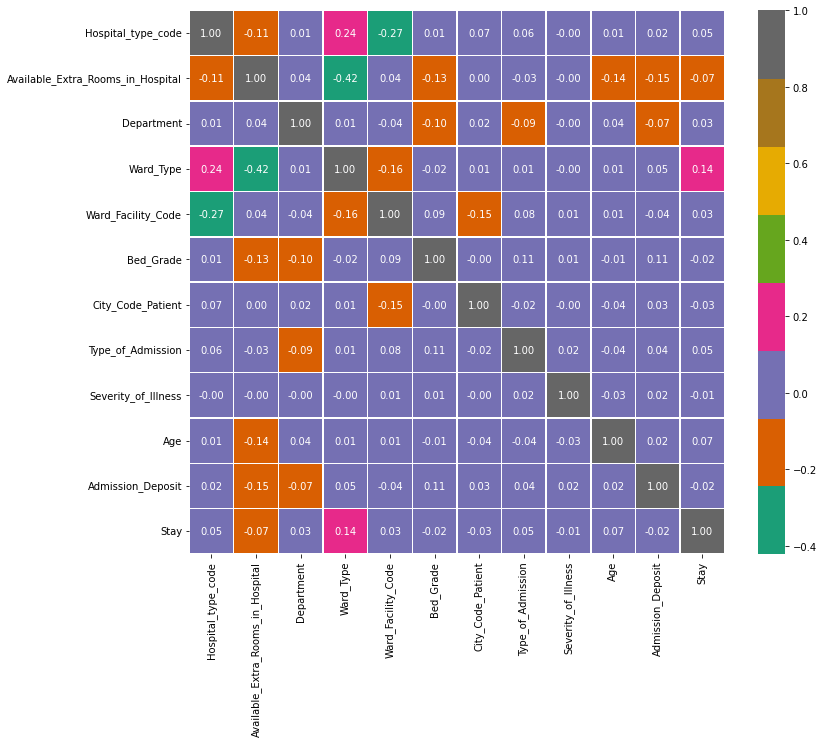

In [ ]:
import seaborn as sns
fig,ax=plt.subplots(figsize=(12,10))
ax=sns.heatmap(corr_mat,
              annot=True,
              linewidths=0.5,
              cmap='Dark2',
              fmt='.2f')

### Plotting a pairplot

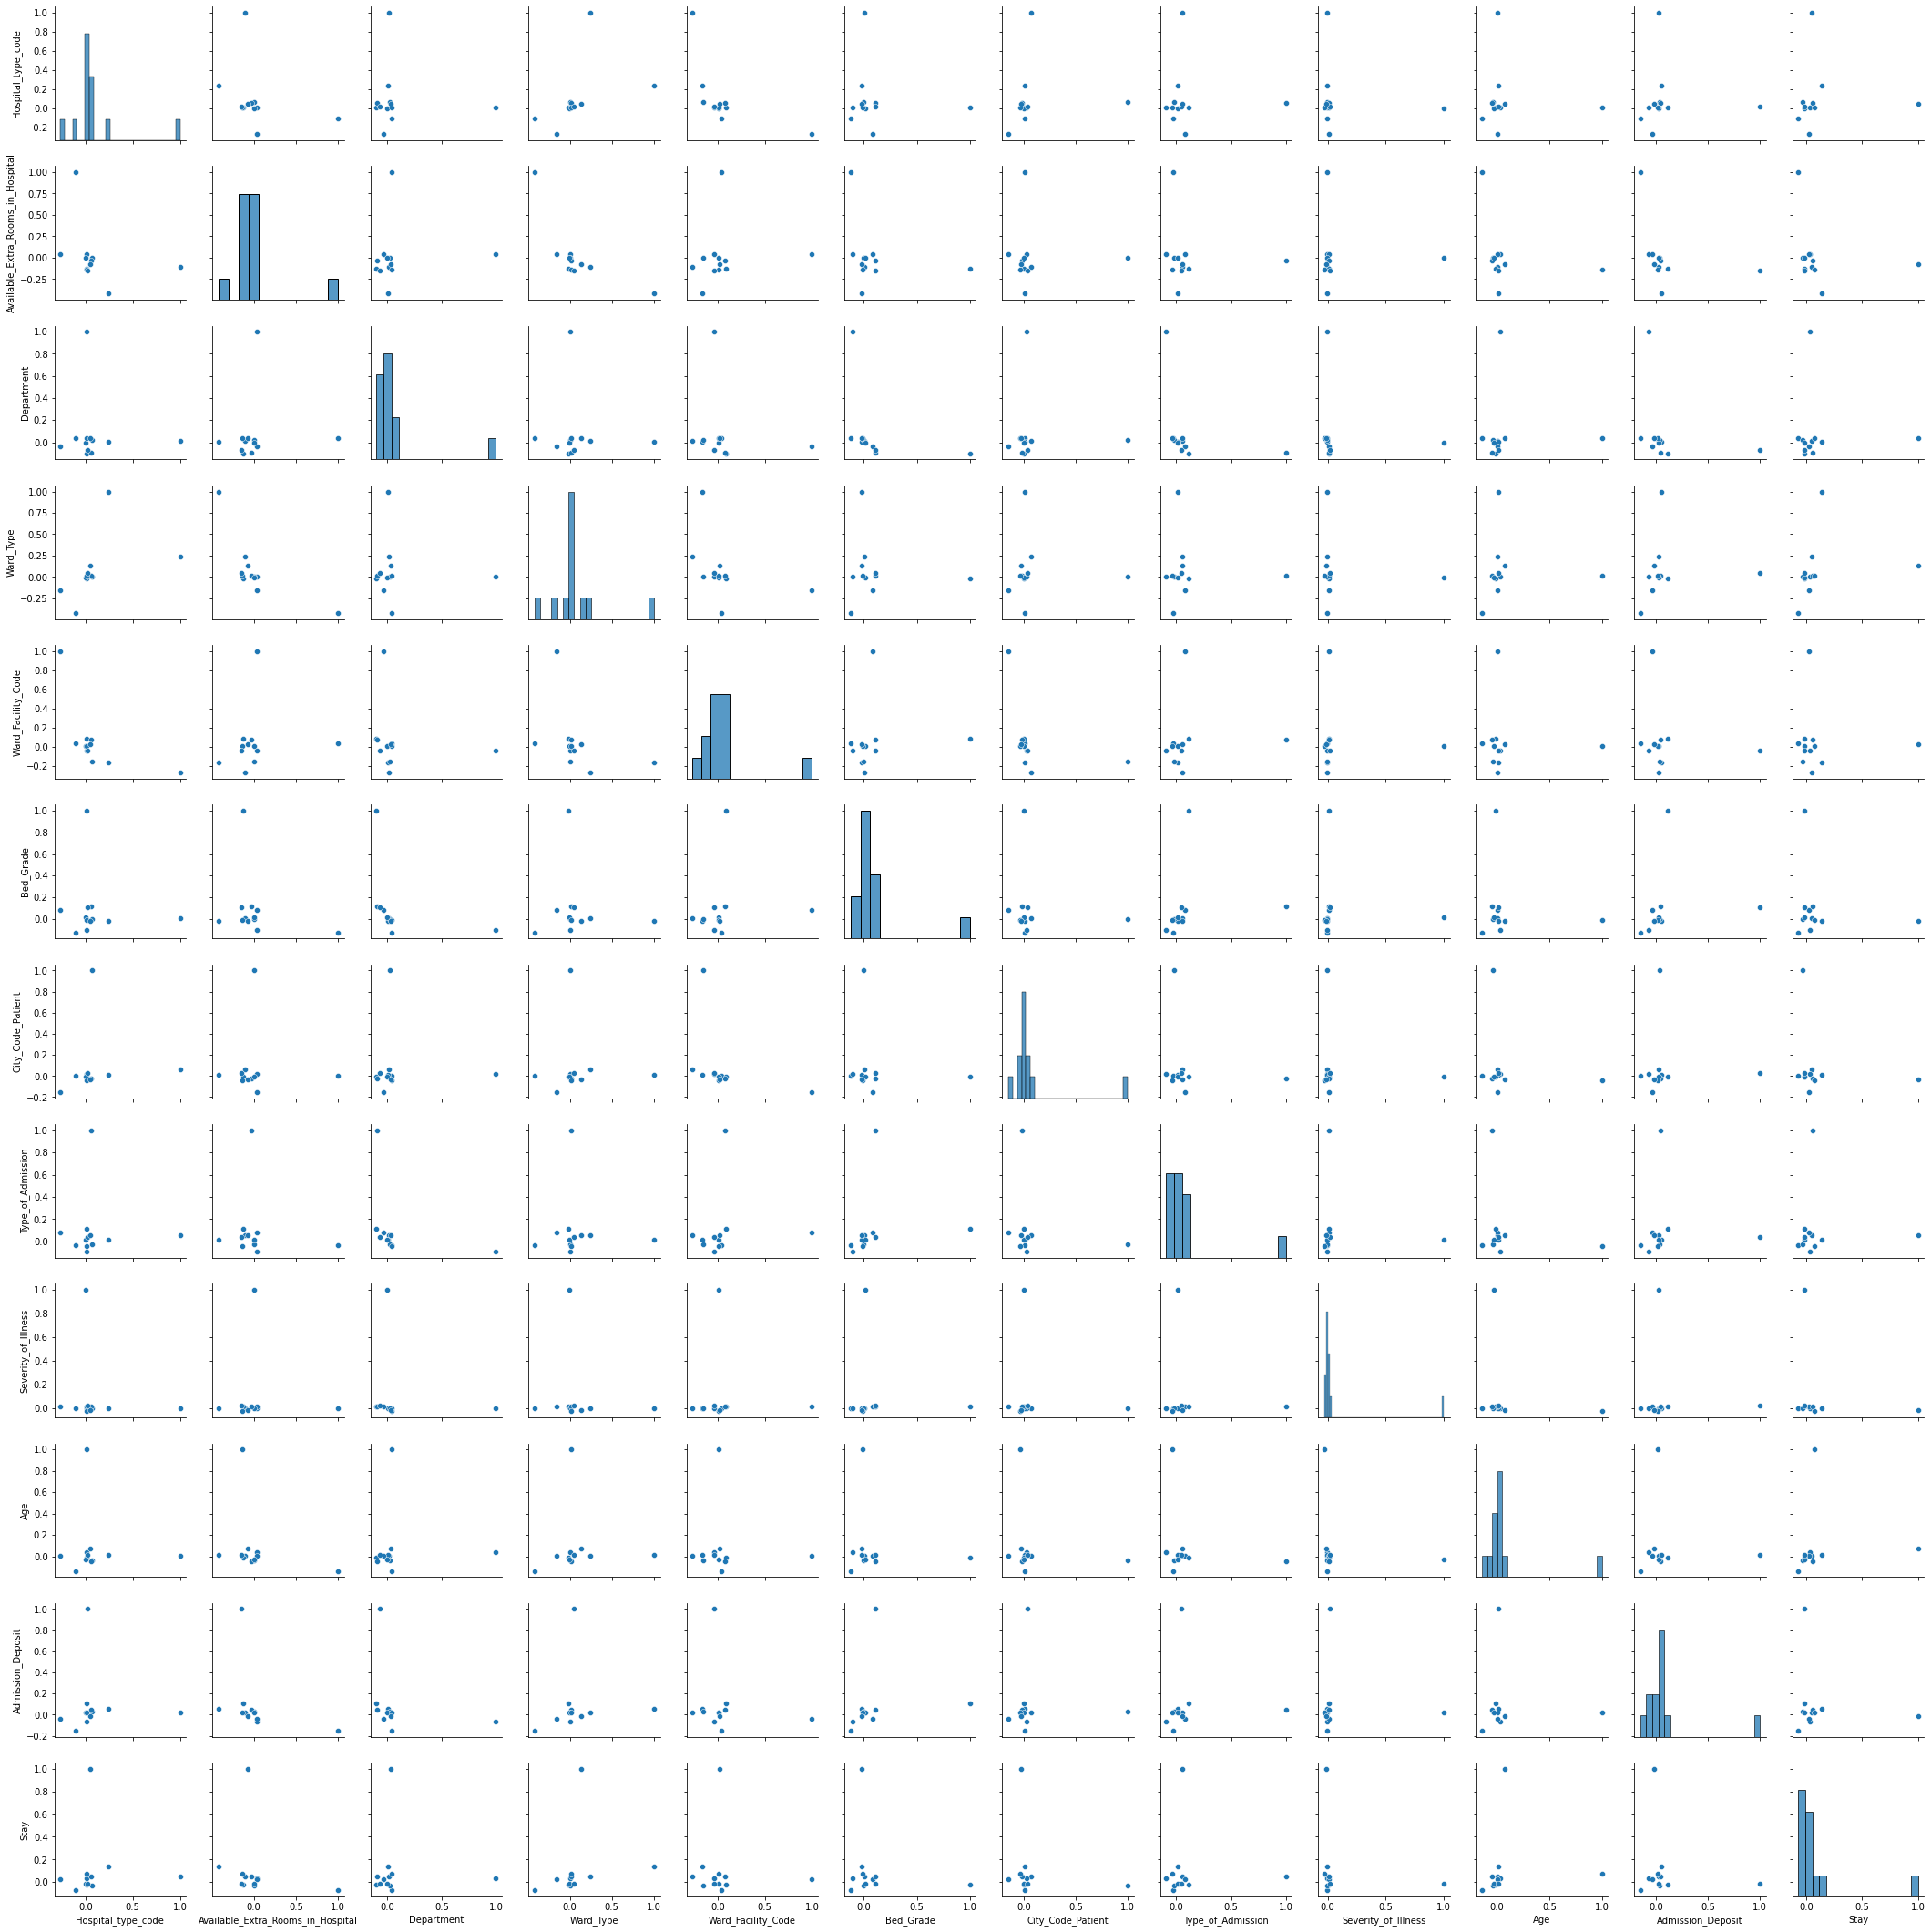

In [ ]:
sns.pairplot(corr_mat);

Using the SVC model

In [ ]:
from sklearn.svm import SVC
model_2=SVC()
model_2.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
model_2.score(X_test,y_test)

0.3015536723163842

Using the Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model_3=RandomForestClassifier()
model_3.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
model_3.score(X_test,y_test)

0.3177966101694915

Using the bagging classifer

In [ ]:
from sklearn.ensemble import BaggingClassifier
model_4=BaggingClassifier()
model_4.fit(X_train,y_train)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [ ]:
model_4.score(X_test,y_test)

0.3135593220338983

Using the Ridge Classifer

In [ ]:
from sklearn.linear_model import RidgeClassifier
model_5=RidgeClassifier()
model_5.fit(X_train,y_train)

RidgeClassifier(alpha=1.0, class_weight=None, copy_X=True, fit_intercept=True,
                max_iter=None, normalize=False, random_state=None,
                solver='auto', tol=0.001)

In [ ]:
model_5.score(X_test,y_test)

0.3495762711864407

Using the Gradient Boosting Classifer

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
model_6=GradientBoostingClassifier()
model_6.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
model_6.score(X_test,y_test)

0.3728813559322034

Hist Gradient Boosting Classifier

In [ ]:
from sklearn.datasets import make_classification
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier

model_7=HistGradientBoostingClassifier()
model_7.fit(X_train,y_train)

HistGradientBoostingClassifier(l2_regularization=0.0, learning_rate=0.1,
                               loss='auto', max_bins=255, max_depth=None,
                               max_iter=100, max_leaf_nodes=31,
                               min_samples_leaf=20, n_iter_no_change=None,
                               random_state=None, scoring=None, tol=1e-07,
                               validation_fraction=0.1, verbose=0,
                               warm_start=False)

In [ ]:
model_7.score(X_test,y_test)

0.3516949152542373

Plotting our final results for all 6 models used

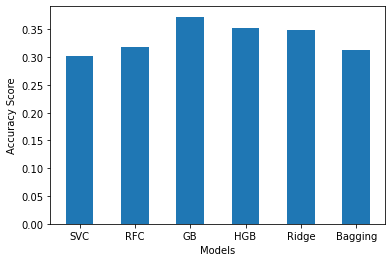

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array(["SVC", "RFC", "GB", "HGB","Ridge","Bagging"])
y = np.array([model_2.score(X_test,y_test),model_3.score(X_test,y_test),model_6.score(X_test,y_test),model_7.score(X_test,y_test),model_5.score(X_test,y_test),model_4.score(X_test,y_test)])
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.bar(x,y,width = 0.5)
plt.show()

Scores

In [ ]:
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_results(y_true, y_pred):
  """
  Calculates model accuracy, precision, recall and f1 score of a binary classification model.
  Args:
      y_true: true labels in the form of a 1D array
      y_pred: predicted labels in the form of a 1D array
  Returns a dictionary of accuracy, precision, recall, f1-score.
  """
  # Calculate model accuracy
  model_accuracy = accuracy_score(y_true, y_pred) * 100
  # Calculate model precision, recall and f1 score using "weighted average
  model_precision, model_recall, model_f1, _ = precision_recall_fscore_support(y_true, y_pred, average="weighted")
  model_results = {"accuracy": model_accuracy,
                  "precision": model_precision,
                  "recall": model_recall,
                  "f1": model_f1}
  return model_results

### Calculating the accuracy of HistGradientBoostingClassifier

In [ ]:
hgbc_preds=model_7.predict(X_test)
hgbc_preds

array([1, 2, 2, ..., 1, 2, 3])

In [ ]:
hgbc_results=calculate_results(y_true=y_test,
                  y_pred=hgbc_preds)

{'accuracy': 35.16949152542373,
 'f1': 0.32957921275011104,
 'precision': 0.32961219979899087,
 'recall': 0.3516949152542373}

### Calculating the accuracy of RandomForestClassifier

In [ ]:
rfclf_preds=model_3.predict(X_test)
rfclf_results=calculate_results(y_true=y_test,
                  y_pred=rfclf_preds)
rfclf_results

{'accuracy': 33.88370423546303,
 'f1': 0.3189207823783005,
 'precision': 0.3192936582390615,
 'recall': 0.3388370423546303}

In [ ]:
ridgeclf_preds=model_5.predict(X_test)
ridge_results=calculate_results(y_true=y_test,
                  y_pred=ridgeclf_preds)
ridge_results

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'accuracy': 33.74012921751615,
 'f1': 0.2629733045366101,
 'precision': 0.2528677276406577,
 'recall': 0.3374012921751615}

In [ ]:
gbclf_preds=model_3.predict(X_test)
gbclf_results=calculate_results(y_true=y_test,
                  y_pred=gbclf_preds)
gbclf_results

{'accuracy': 33.88370423546303,
 'f1': 0.3189207823783005,
 'precision': 0.3192936582390615,
 'recall': 0.3388370423546303}

In [ ]:
# Combine model results into a DataFrame
import pandas as pd
all_model_results=pd.DataFrame({"Gradient_Boosting_Results":gbclf_results,
                                "Hist_Gradient_Boosting_Results":hgbc_results,
                                "Ridge_Classifier_Results":ridge_results,
                                "Random_Forest_Classifier_Results":rfclf_results})
all_model_results=all_model_results.transpose()
all_model_results

,accuracy,precision,recall,f1
Gradient_Boosting_Results,33.883704,0.319294,0.338837,0.318921
Hist_Gradient_Boosting_Results,32.878679,0.302077,0.328787,0.306848
Ridge_Classifier_Results,33.740129,0.252868,0.337401,0.262973
Random_Forest_Classifier_Results,33.883704,0.319294,0.338837,0.318921


## Hyperparameter Tuning

### Tuning the hyperparameters of `GradientBoostingClassifier`

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

model_1 = GradientBoostingClassifier()
parameters = {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1,10,100]
}


cv = GridSearchCV(model_1,parameters,cv=5)
cv.fit(X_train,y_train)